<a href="https://colab.research.google.com/github/ahmedebeed555/KNN/blob/main/knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Nearest Neighbors (KNN): A Complete Guide
This notebook demonstrates KNN classification, including data cleaning, visualization, model training, and evaluation.

In [1]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## Load and Explore the Dataset
We will use the Iris dataset from scikit-learn, a classic dataset for classification tasks.

In [2]:
# Load the Iris dataset
from sklearn.datasets import load_iris
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Data Cleaning
We will check for missing values, duplicates, and ensure the data is ready for modeling.

In [3]:
# Check for missing values
print(df.isnull().sum())

# Check for duplicates
print('Duplicates:', df.duplicated().sum())

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64
Duplicates: 1


## Data Visualization
Let's visualize the distribution of some features and the relationship with the target variable.

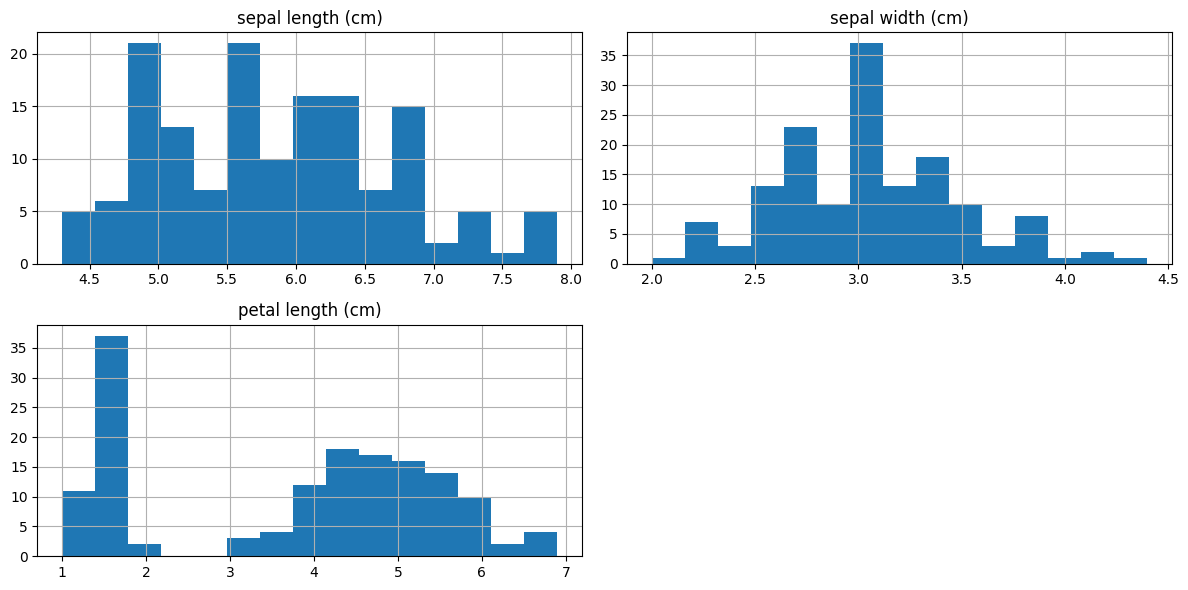

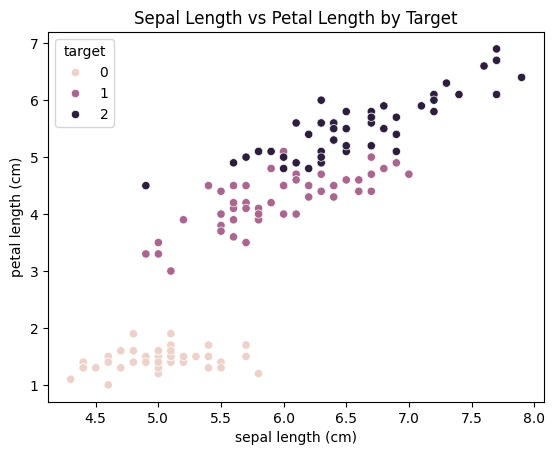

In [4]:
# Visualize the distribution of a few features
features = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)']
df[features].hist(bins=15, figsize=(12, 6))
plt.tight_layout()
plt.show()

# Visualize the relationship between two features colored by target
sns.scatterplot(x='sepal length (cm)', y='petal length (cm)', hue='target', data=df)
plt.title('Sepal Length vs Petal Length by Target')
plt.show()

## Prepare Data for Training
We will split the data into features and target, then into training and test sets.

In [5]:
# Split data into features and target
X = df.drop('target', axis=1)
y = df['target']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Train K-Nearest Neighbors Model
We will instantiate and fit a KNN classifier using the training data.

In [6]:
# Instantiate and train the model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

## Evaluate Model Performance
We will evaluate the model using accuracy, confusion matrix, and classification report.

In [7]:
# Predict and evaluate
y_pred = knn.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))

Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

